Predict the CaCO3 and TOC using the latest models (2021 Aug.) on the whole spetra.

In [15]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

#plt.style.use('ggplot')
plt.style.use('seaborn-colorblind')
#plt.style.use('dark_background')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.transparent'] = True

%matplotlib inline

import datetime
date = datetime.datetime.now().strftime('%Y%m%d')
print(date)

20220104


# Read spe dataset and models

In [3]:
merge_df = pd.read_csv('data/spe+bulk_dataset_20210825.csv', index_col=0)
spe_df = pd.read_csv('data/spe_dataset_20210818.csv', index_col=0)
spe_df

,0,1,2,3,4,5,6,7,8,9,...,2044,2045,2046,2047,cps,core,composite_depth_mm,section_depth_mm,filename,section
composite_id,,,,,,,,,,,,,,,,,,,,,
SO264-09-2_00010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,174740,SO264-09-2,10,10,SO264-09-2_0000 10.0mm 10s 10kV 150uA No-F...,0
SO264-09-2_00020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,176896,SO264-09-2,20,20,SO264-09-2_0000 20.0mm 10s 10kV 150uA No-F...,0
SO264-09-2_00030,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,183148,SO264-09-2,30,30,SO264-09-2_0000 30.0mm 10s 10kV 150uA No-F...,0
SO264-09-2_00040,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,185151,SO264-09-2,40,40,SO264-09-2_0000 40.0mm 10s 10kV 150uA No-F...,0
SO264-09-2_00050,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,186255,SO264-09-2,50,50,SO264-09-2_0000 50.0mm 10s 10kV 150uA No-F...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SO202-37-2_re_11340,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,257201,SO202-37-2_re,11340,960,SO202-37-2_1038 960.0mm 10s 10kV 150uA No-F...,1
SO202-37-2_re_11350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,259019,SO202-37-2_re,11350,970,SO202-37-2_1038 970.0mm 10s 10kV 150uA No-F...,1
SO202-37-2_re_11360,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,262329,SO202-37-2_re,11360,980,SO202-37-2_1038 980.0mm 10s 10kV 150uA No-F...,1


In [4]:
spe_df = spe_df[spe_df.core != 'SO202-37-2_re']
spe_df.shape

(57240, 2054)

In [19]:
merge_df

,0,1,2,3,4,5,6,7,8,9,...,2043,2044,2045,2046,2047,TC%,TOC%,CaCO3%,core,mid_depth_mm
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.542079,0.394127,17.898887,SO264-64-1,115.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.247150,0.611208,13.632300,SO264-64-1,215.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.710588,0.523402,1.559822,SO264-64-1,305.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.562171,0.472551,0.746802,SO264-64-1,1015.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.578167,0.312852,2.210866,SO264-64-1,1815.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.137845,0.268411,24.091000,PS75-056-1,9755.0
99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.434429,0.267635,26.568000,PS75-056-1,9855.0
100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.583974,0.239806,28.045000,PS75-056-1,9945.0
101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.125558,0.182222,24.707000,PS75-056-1,10055.0


In [50]:
2000/57240*100

3.494060097833683

In [5]:
X = spe_df.iloc[:, :2048].values
X = X / X.sum(axis = 1, keepdims = True)

In [6]:
from joblib import load
m_caco3 = load('models/caco3_nmf+svr_model_20210823.joblib')
m_toc_svr = load('models/toc_nmf+svr_model_20210823.joblib')

# Predict

In [7]:
y_caco3 = np.exp(m_caco3.predict(X))
y_toc_svr = np.exp(m_toc_svr.predict(X))

# Build dataset

In [8]:
predict_df = spe_df.iloc[:, -5:].copy()
predict_df['CaCO3 prediction (wt%)'] = y_caco3
predict_df['TOC prediction (wt%)'] = y_toc_svr

# Check

In [9]:
mask = (predict_df['CaCO3 prediction (wt%)'] > 100) | (predict_df['TOC prediction (wt%)'] > 100) 

print('There are {} ({:.2f} %) predictions having values over 100.'.format(len(predict_df[mask]), len(predict_df[mask])/len(predict_df)*100))

There are 410 (0.72 %) predictions having values over 100.


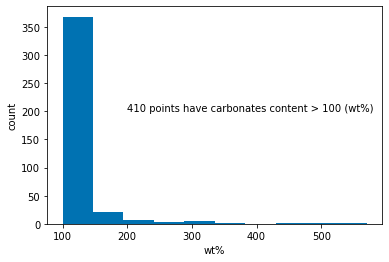

In [13]:
plt.hist(predict_df.loc[predict_df['CaCO3 prediction (wt%)'] > 100, 'CaCO3 prediction (wt%)'])
plt.text(200, 200, '{} points have carbonates content > 100 (wt%)'.format(len(predict_df[predict_df['CaCO3 prediction (wt%)'] > 100])))
plt.ylabel('count')
plt.xlabel('wt%');

In [14]:
predict_df.to_csv('results/predict_{}.csv'.format(date))
print(date)

20220104


## Plot the resolution difference

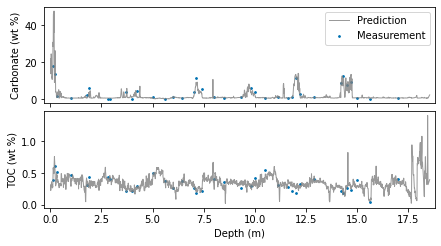

In [49]:
core = 'SO264-64-1'
fig, axes = plt.subplots(2, 1, figsize=(7, 3.7), sharex='col')

axes[0].plot(predict_df.loc[predict_df.core == core, 
    'composite_depth_mm']*.001, predict_df.loc[predict_df.core == core, 'CaCO3 prediction (wt%)'], 
    label='Prediction', alpha=.8, c='gray', lw=1)

axes[0].scatter(merge_df.loc[merge_df.core == core, 
    'mid_depth_mm']*.001, merge_df.loc[merge_df.core == core, 'CaCO3%'], 
    label='Measurement', s=3)
axes[0].set_ylabel('Carbonate (wt %)')
axes[0].set_xlim(-.3, 18.8)
axes[0].legend()

axes[1].plot(predict_df.loc[predict_df.core == core, 
    'composite_depth_mm']*.001, predict_df.loc[predict_df.core == core, 'TOC prediction (wt%)'], 
    label='Prediction', alpha=.8, c='gray', lw=1)
axes[1].scatter(merge_df.loc[merge_df.core == core, 
    'mid_depth_mm']*.001, merge_df.loc[merge_df.core == core, 'TOC%'], 
    label='Measurement', s=3)
axes[1].set_ylabel('TOC (wt %)')

axes[1].set_xlabel('Depth (m)')
fig.subplots_adjust(hspace=.08)
fig.savefig('results/prediction_{}_{}.png'.format(core, date))